<a href="https://colab.research.google.com/github/Neural-Matheus/TextClassifier/blob/main/TextClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importação do Drive com os arquivos**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Importação inicial das bibliotecas**


####Fazer a instalação das bibliotecas

```
# !pip install transformers
```



In [ ]:
!pip install transformers

In [ ]:
!pip install jsonlines

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install nltk

In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install accelerate -U

####Fazer a importação das bibliotecas



In [ ]:
from transformers import RobertaTokenizer

In [33]:
import torch
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
import math
import re
import os
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [67]:
!pip install bert-for-tf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30509 sha256=f1d0dcb92999672e7589e13d2dd8f39b87ce93c1771210a1bc9b4cf88c04a9ca
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19454 sha256=6288a1d4a93153dc7fcd39c86b1106fe53eee34ddd65356c7e59a46ddbe8340e
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7891 sha256=8dde8b93a58d5e17e6890fcb5bfea58f354b2c512945f2cb1d4b25fa1800942d
  Stored in directory: /root/.cache/pip/wheels/69/c8/b3/92666cff9fb312bc3473eaa6b396695b89a7b3e31e908768

In [68]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.8 MB/s eta 0:00:00


In [69]:
import tensorflow_hub as hub

In [70]:
from tensorflow.keras import layers
import bert

In [8]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

In [44]:
import os
import pandas as pd

def read_and_concatenate_dataframes(directory, new_column_name, value):
    """
    Read JSONL files in the specified directory, add a new column to each DataFrame,
    and concatenate all DataFrames into a single DataFrame.

    Parameters:
    - directory: The path to the directory containing JSONL files.
    - new_column_name: The name of the new column to be added.
    - value: The value to be assigned to the new column.

    Returns:
    A DataFrame containing all the concatenated data.
    """

    # List to store DataFrames
    data_frames_list = []

    # Iterate over files in the directory
    for file_name in os.listdir(directory):
        if file_name.endswith('.jsonl'):
            file_path = os.path.join(directory, file_name)

            # Read the JSONL file and add to the DataFrame list
            temp_df = pd.read_json(file_path, lines=True, encoding='latin1')

            # Add a new column with specified name and value
            temp_df[new_column_name] = value

            data_frames_list.append(temp_df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(data_frames_list, ignore_index=True)

    return result_df

# Example usage
directory_pathG = '/content/drive/MyDrive/opengpttext-clean/chatgpt/'
directory_pathH = '/content/drive/MyDrive/opengpttext-clean/openweb/'
new_column = 'value'

# Call the function with value 0 for GPT data and value 1 for human data
data_gpt = read_and_concatenate_dataframes(directory_pathG, new_column, value=0)
data_human = read_and_concatenate_dataframes(directory_pathH, new_column, value=1)

In [45]:
data_human

,uid,text,value
0,[urlsf_subset00]-[83],Check current weather conditions\nIt's going t...,1
1,[urlsf_subset00]-[89],"On Thursday, the president of the United State...",1
2,[urlsf_subset00]-[390],Curitiba -\nEl delantero Enner Valencia marco ...,1
3,[urlsf_subset00]-[457],Getting started\n(I'm using Windows 10)\nAfter...,1
4,[urlsf_subset00]-[458],"Today, Mexico's newest data retention law ente...",1
...,...,...,...
29137,[urlsf_subset09]-[389268],Academic freedom -- for conservatives -- died ...,1
29138,[urlsf_subset09]-[389288],When Dylan Higgins invited me on to the Field ...,1
29139,[urlsf_subset09]-[389386],John Kasich. AP Photo/John Minchillo\nJohn Kas...,1
29140,[urlsf_subset09]-[389484],A Navy-funded thermal engine bobbing off the c...,1


In [46]:
data_gpt

,uid,text,value
0,[urlsf_subset01]-[362358],The US is to review its military support for S...,0
1,[urlsf_subset01]-[116340],Some game developers are seeking inspiration f...,0
2,[urlsf_subset01]-[299487],IntercontinentalExchange's acquisition of the ...,0
3,[urlsf_subset01]-[137018],According to research from The University of W...,0
4,[urlsf_subset01]-[302038],The Davao City Council has declared comedian R...,0
...,...,...,...
29390,[urlsf_subset05]-[141028],"The article ""Creative underexposure with a Nik...",0
29391,[urlsf_subset05]-[49964],The special education services that New York S...,0
29392,[urlsf_subset05]-[116459],"During the third week of the trial, two opposi...",0
29393,[urlsf_subset05]-[67867],"Mogwai Young Team, the debut studio album by S...",0


In [49]:
data_human.shape

(29142, 3)

In [48]:
data_gpt.shape

(29395, 3)

In [54]:
# Concatenar os DataFrames em uma única variável
combined_data = pd.concat([data_gpt, data_human], ignore_index=True)
combined_data = combined_data.drop(combined_data.columns[0], axis=1)

In [55]:
combined_data

,text,value
0,The US is to review its military support for S...,0
1,Some game developers are seeking inspiration f...,0
2,IntercontinentalExchange's acquisition of the ...,0
3,According to research from The University of W...,0
4,The Davao City Council has declared comedian R...,0
...,...,...
58532,Academic freedom -- for conservatives -- died ...,1
58533,When Dylan Higgins invited me on to the Field ...,1
58534,John Kasich. AP Photo/John Minchillo\nJohn Kas...,1
58535,A Navy-funded thermal engine bobbing off the c...,1


In [56]:
combined_data.head()

,text,value
0,The US is to review its military support for S...,0
1,Some game developers are seeking inspiration f...,0
2,IntercontinentalExchange's acquisition of the ...,0
3,According to research from The University of W...,0
4,The Davao City Council has declared comedian R...,0


In [57]:
combined_data.tail()

,text,value
58532,Academic freedom -- for conservatives -- died ...,1
58533,When Dylan Higgins invited me on to the Field ...,1
58534,John Kasich. AP Photo/John Minchillo\nJohn Kas...,1
58535,A Navy-funded thermal engine bobbing off the c...,1
58536,A U.S. Army Black Hawk helicopter is seen. (Ph...,1


# **Part 2 - Métricas de Análise do DataSet**



### **Cálculo do comprimento dos Textos**


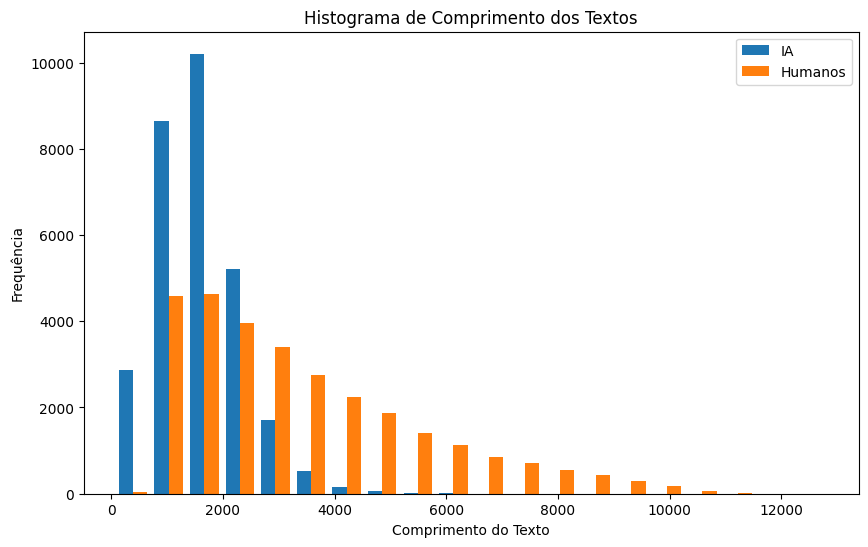

In [ ]:
# Cálculo do Comprimento dos Textos
ia_data['text_length'] = ia_data['text'].apply(lambda x: len(x))
human_data['text_length'] = human_data['text'].apply(lambda x: len(x))

# Histograma de comprimento dos textos
plt.figure(figsize=(10, 6))
plt.hist([ia_data['text_length'], human_data['text_length']], bins=20, label=['IA', 'Humanos'])
plt.title('Histograma de Comprimento dos Textos')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.legend()
plt.show()


### **Cálculo da diversidade vocabular de um texto**


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


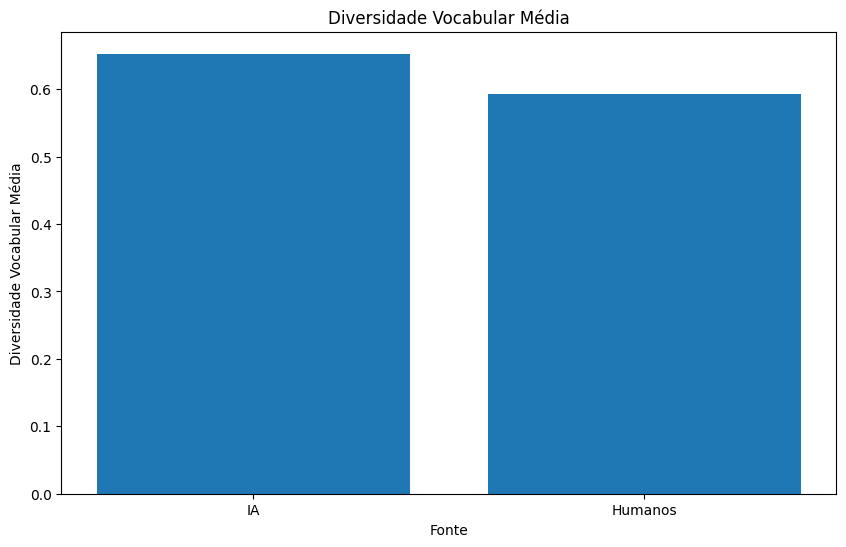

In [ ]:
nltk.download('vader_lexicon')

# Função para calcular a diversidade vocabular de um texto
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

# Cálculo da diversidade vocabular e adição ao DataFrame
ia_data['lexical_diversity'] = ia_data['text'].apply(lexical_diversity)
human_data['lexical_diversity'] = human_data['text'].apply(lexical_diversity)

# Gráfico de diversidade vocabular
plt.figure(figsize=(10, 6))
plt.bar(['IA', 'Humanos'], [ia_data['lexical_diversity'].mean(), human_data['lexical_diversity'].mean()])
plt.title('Diversidade Vocabular Média')
plt.xlabel('Fonte')
plt.ylabel('Diversidade Vocabular Média')
plt.show()


### **Análise de Sentimento**


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


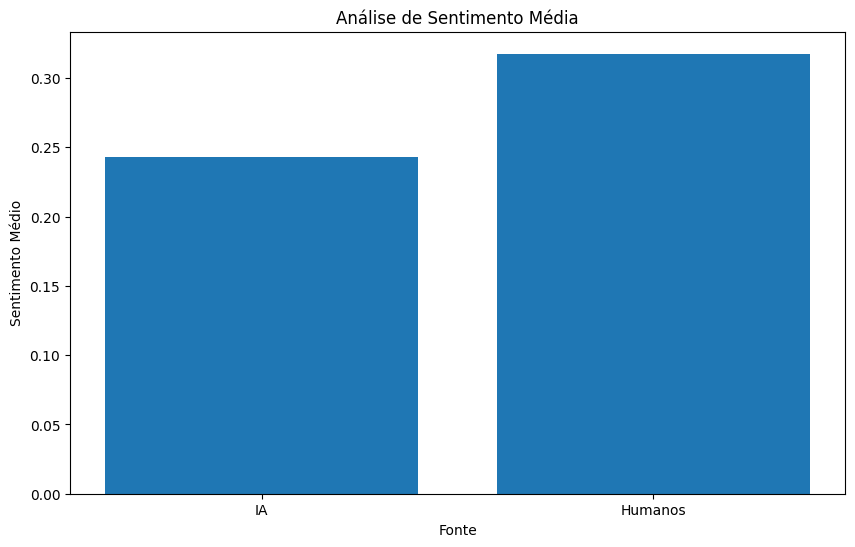

In [ ]:
nltk.download('vader_lexicon')

# Análise de Sentimento
analyzer = SentimentIntensityAnalyzer()
ia_data['sentiment_score'] = ia_data['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
human_data['sentiment_score'] = human_data['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Gráfico de barras para análise de sentimento
plt.figure(figsize=(10, 6))
plt.bar(['IA', 'Humanos'], [ia_data['sentiment_score'].mean(), human_data['sentiment_score'].mean()])
plt.title('Análise de Sentimento Média')
plt.xlabel('Fonte')
plt.ylabel('Sentimento Médio')
plt.show()

# **Part 3 - Arquitetura de Modelos**


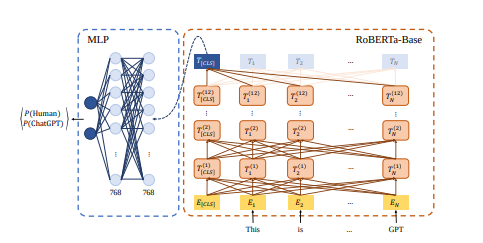
____________________________________________________________
## Detalhando o RoBERTa-Base

O RoBERTa-Base, um modelo popular, adota uma arquitetura com 12 camadas, cada uma composta por 768 neurônios, também denominados unidades de processamento. Durante a etapa de tokenização e processamento do texto, cada token (seja palavra ou subpalavra) é representado por um vetor de 768 valores numéricos.

A camada de classificação, usada em tarefas específicas (como classificação de texto, perguntas e respostas, entre outras), recebe como entrada esses vetores de representação, também conhecidos como embeddings, com dimensão de 768. Para realizar a classificação, um modelo adicional, como uma Multilayer Perceptron (MLP), é anexado ao final dessas representações para executar a tarefa desejada, como a classificação de texto em categorias.

Portanto, ao mencionar a necessidade de 768 neurônios na camada de classificação para receber vetores ocultos de 768 dimensões, isso significa que a camada de classificação deve ter a mesma dimensionalidade dos vetores ocultos produzidos pelo modelo, permitindo o processamento consistente dessas representações para a tarefa específica.

A escolha de 768 neurônios na camada de classificação garante a compatibilidade e capacidade do modelo de processar e classificar corretamente as representações ocultas aprendidas pelo RoBERTa, mantendo a integridade das informações essenciais durante a etapa de classificação ou tarefa específica em execução.
____________________________________________________________

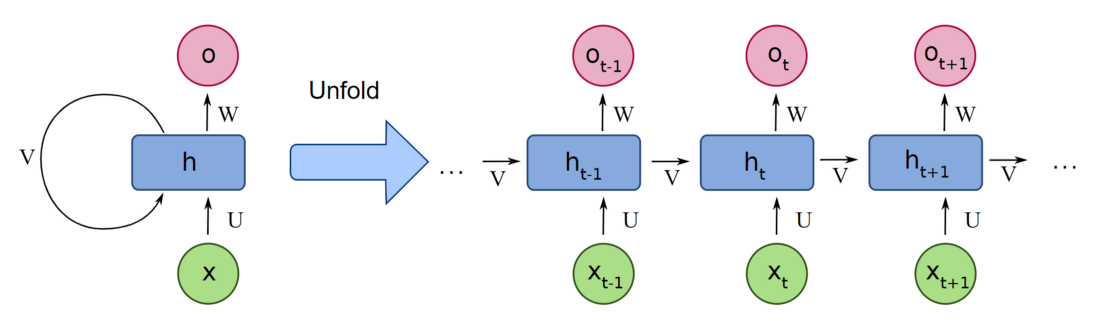

____________________________________________________________
## Detalhando RNN
Uma RNN é projetada para lidar com dados sequenciais, como séries temporais ou texto. Aqui estão os componentes principais:

Entrada (Input): Em cada passo, a RNN recebe uma entrada, que pode ser um vetor de características, uma palavra em uma sequência de palavras, ou qualquer dado sequencial.

Estado Oculto (Hidden State): A RNN mantém um estado oculto que atua como sua "memória". Esse estado é atualizado a cada passo, levando em consideração a entrada atual e o estado oculto anterior.

Função de Atualização (Update Function): A função de atualização utiliza a entrada atual e o estado oculto anterior para calcular o novo estado oculto. Isso ajuda a capturar as informações das etapas anteriores.

Saída (Output): Com base no estado oculto atualizado, a RNN gera uma saída. Essa saída pode ser usada para prever o próximo elemento em uma sequência, classificar um dado, ou realizar outras tarefas, dependendo do propósito da rede.

As RNNs são poderosas para lidar com dados sequenciais, mas têm desafios, como o problema do desaparecimento do gradiente. Para contornar isso, arquiteturas mais avançadas, como LSTMs e GRUs, foram desenvolvidas.
____________________________________________________________

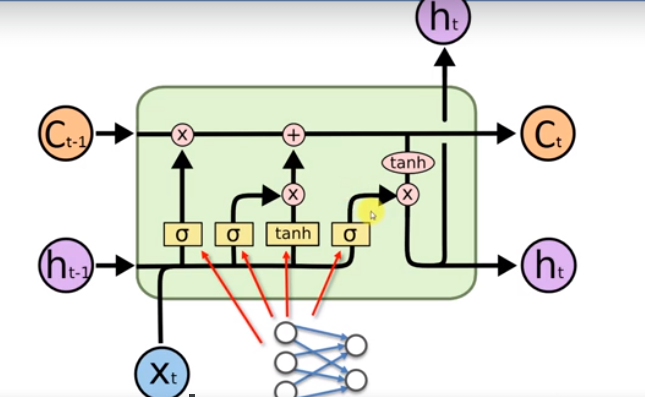

____________________________________________________________
## Detalhando o LSTM
A LSTM é composta por células de memória, e cada célula tem três portões: esquecimento (forget gate), entrada (input gate), e saída (output gate). Vamos detalhar cada parte:

Célula de Memória (Memory Cell): A célula de memória é a unidade principal que mantém a informação. Ela é atualizada multiplicando o conteúdo anterior da célula de memória por um valor decidido pelo portão de esquecimento e adicionando o resultado ponderado do portão de entrada.

Portão de Esquecimento (Forget Gate): Este portão decide que parte da informação anterior da célula de memória deve ser mantida. Ele recebe como entrada o estado anterior da célula de memória e a entrada atual e produz um valor entre 0 e 1 para cada elemento, representando o quanto deve ser esquecido.

Portão de Entrada (Input Gate): Este portão decide quais novas informações serão armazenadas na célula de memória. É dividido em duas partes:

Uma camada sigmoid que decide quais valores serão atualizados.

Uma camada tanh que gera candidatos a novos valores.

Atualização do Estado de Memória: A célula de memória é atualizada multiplicando o estado anterior pelo resultado do portão de esquecimento e adicionando o resultado do produto entre o portão de entrada sigmoid e a camada tanh.

Portão de Saída (Output Gate): Este portão decide qual parte do estado de memória será a saída da célula. Ele passa o estado da célula de memória através de uma camada sigmoid e, em seguida, aplica uma função tanh para normalizar os valores. O resultado final é multiplicado pelo resultado do portão sigmoid para produzir a saída final.
____________________________________________________________

# **Part 4 - Limpeza dos Textos**


In [50]:
def clean_text(text):
    # Remover menções a usuários
    text = re.sub(r"@[A-Za-z0-9_]+", '', text)
    # Remover URLs
    text = re.sub(r"https?://[A-Za-z0-9./]+", '', text)
    # Manter apenas letras, pontos de exclamação, interrogação e ponto final
    text = re.sub(r"[^A-Za-z.!?]", ' ', text)
    # Remover espaços extras
    text = re.sub(r" +", ' ', text)
    return text

In [61]:
data_clean = [clean_text(tweet) for tweet in combined_data.text]

In [64]:
data_clean[0:3]

['The US is to review its military support for Saudi Arabia as officials warn it will be influenced by whether the kingdom commits to a ceasefire with Houthi rebels in Yemen according to an anonymous source speaking at a press conference. The review follows a Saudi strike on a funeral in the Yemeni capital Sanaa on October which killed more than people. The attack stiffened US concerns about its role in the war which has led to the deaths of more than non combatants. Assistance may continue for the Saudi US border but this will depend on the review s internal deliberations.',
 'Some game developers are seeking inspiration for VR by looking to the past but Funktronix Labs has taken it one step further by releasing its first person VR RTS Cosmic Trip for the Virtual Boy. The game design studio was first taken seriously when it posted a mockup of its design on Reddit a few months ago. If we say we are going to target that platform you better freakin believe that it is coming to that platf

In [66]:
data_labels = combined_data.value.values
data_labels

array([0, 0, 0, ..., 1, 1, 1])

In [71]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer('https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-24-h-1024-a-16/versions/4', trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [73]:
tokenizer.tokenize('english')

['english']

In [74]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize('I love before'))

[1045, 2293, 2077]

In [76]:
def enconde_sentence(sent):
  return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sent))

In [77]:
enconde_sentence("I love before")

[1045, 2293, 2077]

In [78]:
data_inputs = [enconde_sentence(sentence) for sentence in data_clean]

In [79]:
data_inputs[0]

[1996,
 2149,
 2003,
 2000,
 3319,
 2049,
 2510,
 2490,
 2005,
 8174,
 9264,
 2004,
 4584,
 11582,
 2009,
 2097,
 2022,
 5105,
 2011,
 3251,
 1996,
 2983,
 27791,
 2000,
 1037,
 26277,
 2007,
 7570,
 14317,
 2072,
 8431,
 1999,
 13968,
 2429,
 2000,
 2019,
 10812,
 3120,
 4092,
 2012,
 1037,
 2811,
 3034,
 1012,
 1996,
 3319,
 4076,
 1037,
 8174,
 4894,
 2006,
 1037,
 6715,
 1999,
 1996,
 13968,
 2072,
 3007,
 2624,
 11057,
 2006,
 2255,
 2029,
 2730,
 2062,
 2084,
 2111,
 1012,
 1996,
 2886,
 16090,
 2149,
 5936,
 2055,
 2049,
 2535,
 1999,
 1996,
 2162,
 2029,
 2038,
 2419,
 2000,
 1996,
 6677,
 1997,
 2062,
 2084,
 2512,
 26622,
 1012,
 5375,
 2089,
 3613,
 2005,
 1996,
 8174,
 2149,
 3675,
 2021,
 2023,
 2097,
 12530,
 2006,
 1996,
 3319,
 1055,
 4722,
 3972,
 20755,
 28893,
 1012]

In [80]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]

In [81]:
data_with_len[0:2]

[[[1996,
   2149,
   2003,
   2000,
   3319,
   2049,
   2510,
   2490,
   2005,
   8174,
   9264,
   2004,
   4584,
   11582,
   2009,
   2097,
   2022,
   5105,
   2011,
   3251,
   1996,
   2983,
   27791,
   2000,
   1037,
   26277,
   2007,
   7570,
   14317,
   2072,
   8431,
   1999,
   13968,
   2429,
   2000,
   2019,
   10812,
   3120,
   4092,
   2012,
   1037,
   2811,
   3034,
   1012,
   1996,
   3319,
   4076,
   1037,
   8174,
   4894,
   2006,
   1037,
   6715,
   1999,
   1996,
   13968,
   2072,
   3007,
   2624,
   11057,
   2006,
   2255,
   2029,
   2730,
   2062,
   2084,
   2111,
   1012,
   1996,
   2886,
   16090,
   2149,
   5936,
   2055,
   2049,
   2535,
   1999,
   1996,
   2162,
   2029,
   2038,
   2419,
   2000,
   1996,
   6677,
   1997,
   2062,
   2084,
   2512,
   26622,
   1012,
   5375,
   2089,
   3613,
   2005,
   1996,
   8174,
   2149,
   3675,
   2021,
   2023,
   2097,
   12530,
   2006,
   1996,
   3319,
   1055,
   4722,
   3972,
   20755

In [82]:
random.shuffle(data_with_len)
data_with_len.sort(key = lambda x: x [2])
sorted_all = [(sent_lab[0], sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7
              ]

In [83]:
sorted_all[0:5]

[([1996,
   20423,
   2003,
   2525,
   1999,
   3674,
   20423,
   2015,
   2061,
   2053,
   16360,
   13492,
   7741,
   4072,
   1012],
  0),
 ([1996,
   20423,
   3685,
   2022,
   16360,
   13492,
   6924,
   2302,
   5372,
   6123,
   1012,
   3531,
   3073,
   2062,
   2592,
   2030,
   1996,
   2440,
   3720,
   2005,
   8321,
   16360,
   13492,
   7741,
   1012],
  0),
 ([13997,
   14855,
   2290,
   14262,
   21183,
   2061,
   2213,
   14855,
   2290,
   8117,
   3619,
   19117,
   1055,
   25787,
   2615,
   1012,
   7842,
   14855,
   2290,
   14405,
   2906,
   2012,
   2102,
   4241,
   5292,
   2099,
   9350,
   2102,
   1012],
  0),
 ([4067,
   2017,
   2005,
   1996,
   7514,
   1012,
   1045,
   2001,
   2559,
   2005,
   2070,
   22616,
   2006,
   2026,
   2034,
   3535,
   2012,
   1996,
   8785,
   1012,
   1045,
   2001,
   6195,
   7477,
   2075,
   1996,
   15020,
   2005,
   5618,
   2021,
   2052,
   2017,
   18012,
   2114,
   2009,
   1029,
   2079,
   2

# **Part 5 - Treinamento do Modelo**
